In [1]:
!pip install tensorflow

In [2]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.4.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.5.2
anaconda-client                   1.13.0
anaconda-navigator                2.6.6
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.7.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
astroid         

## **Step 1:Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score,f1_score, classification_report

## **Step 2:Data Importing & Analysis**

In [8]:
data_df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [10]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203')]

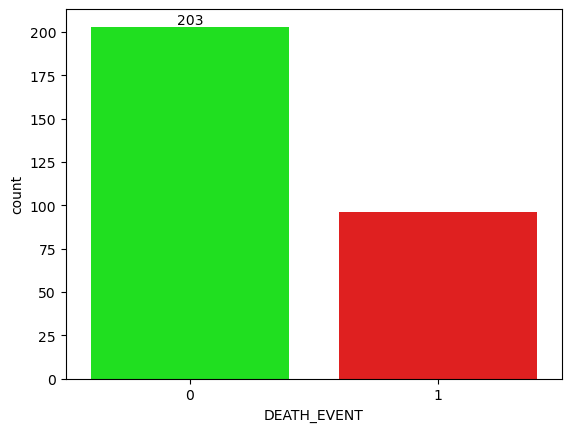

In [13]:
cols = ["#00FF00","#FF0000"]
ax = sns.countplot(
    x="DEATH_EVENT",
    data=data_df,
    hue="DEATH_EVENT",
    palette=cols,
    legend=False
)

ax.bar_label(ax.containers[0])

In [16]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

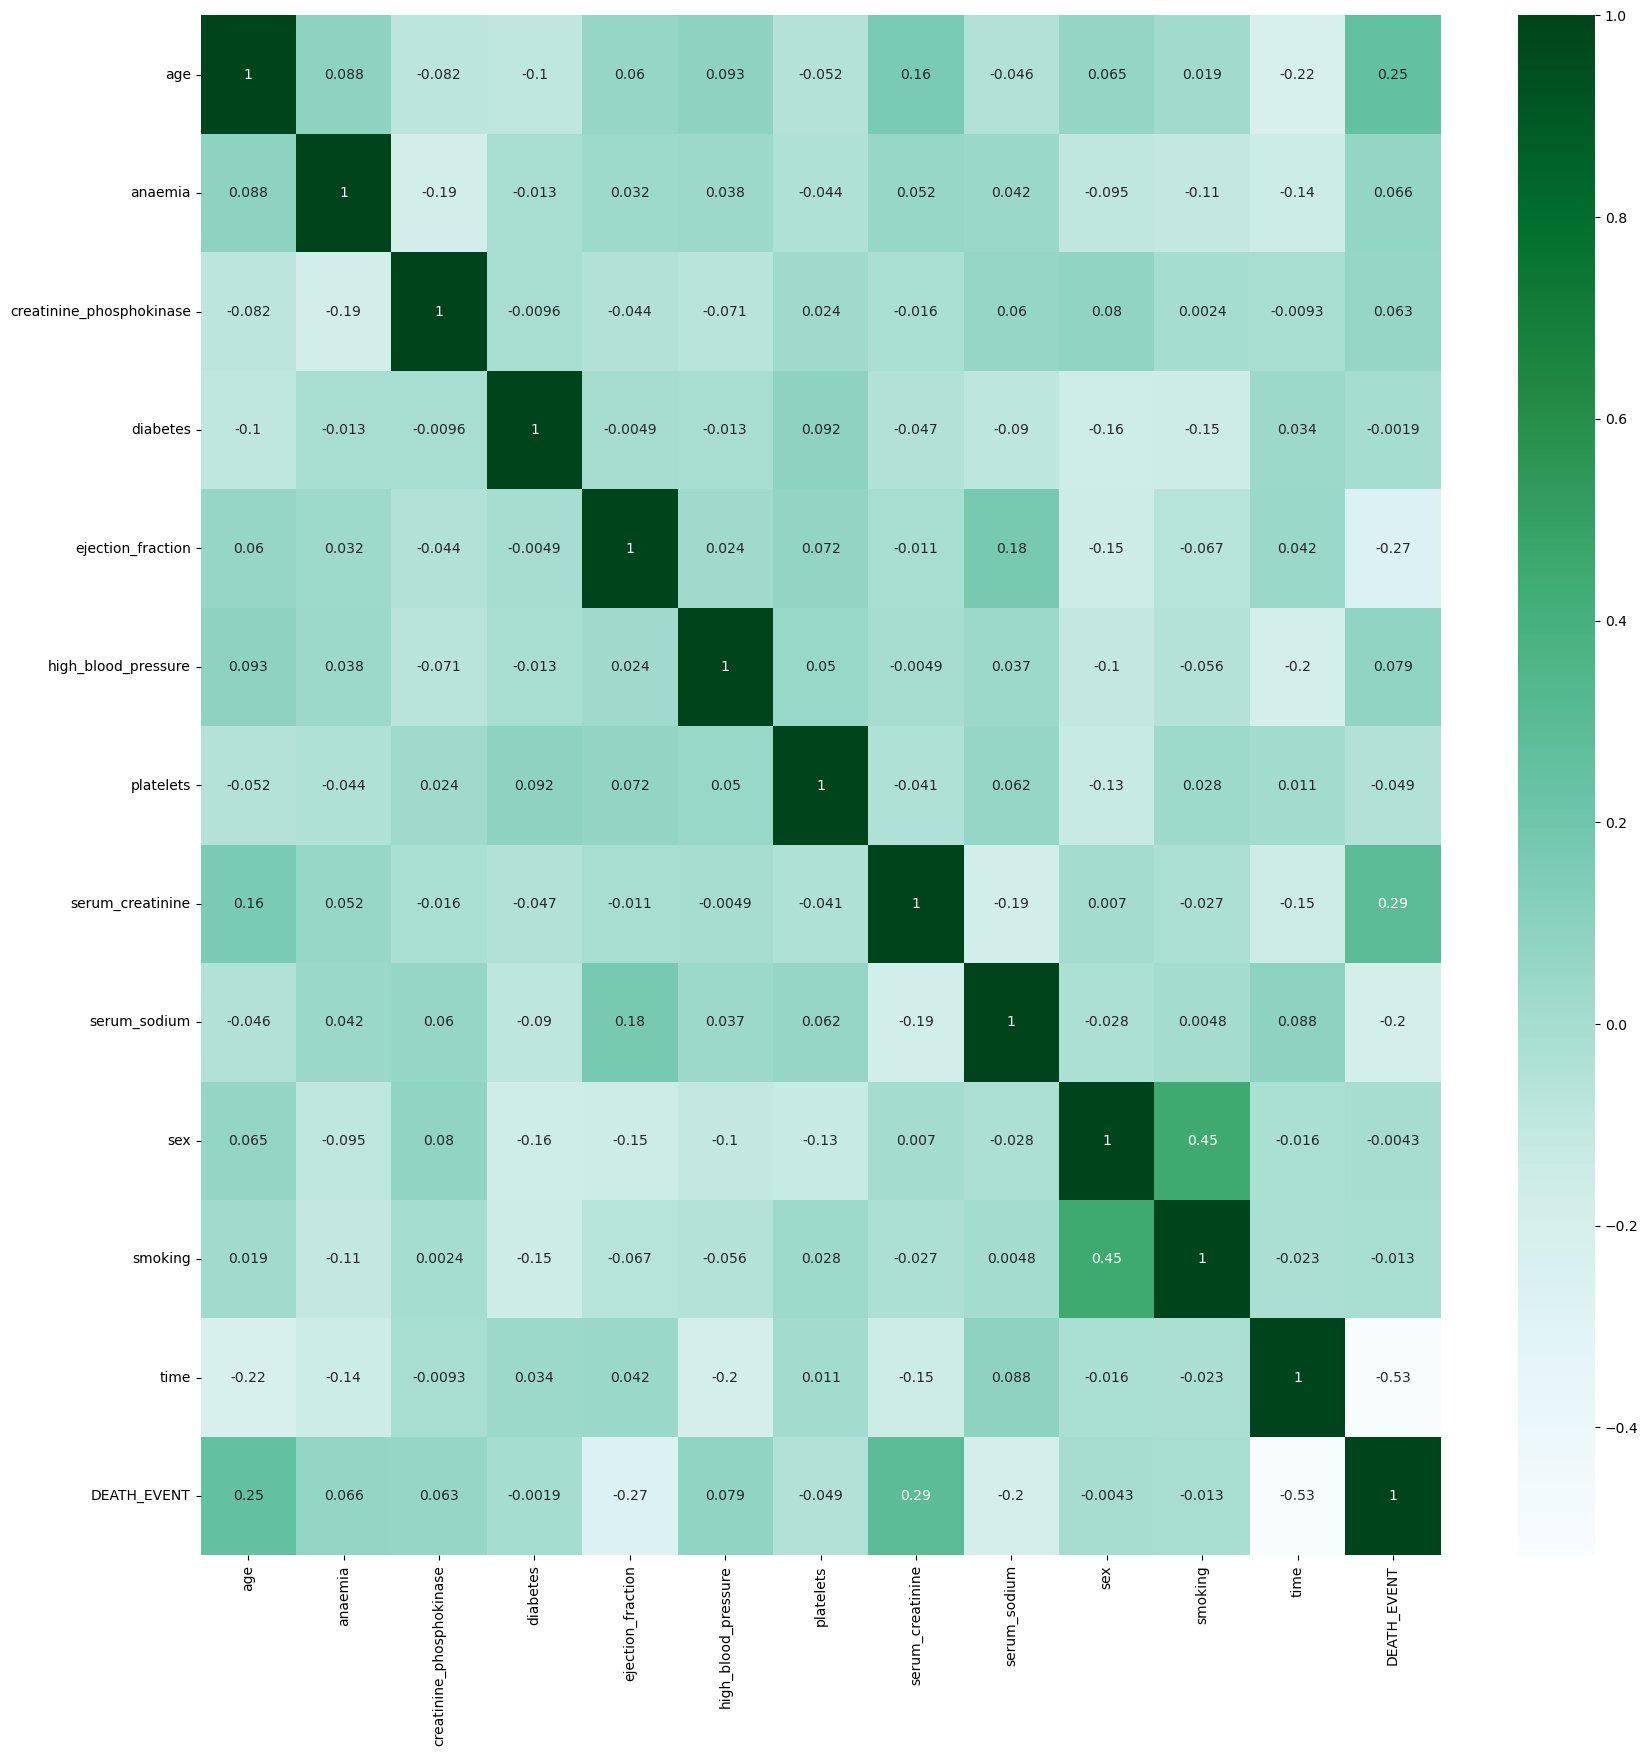

In [18]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap="BuGn",annot=True)

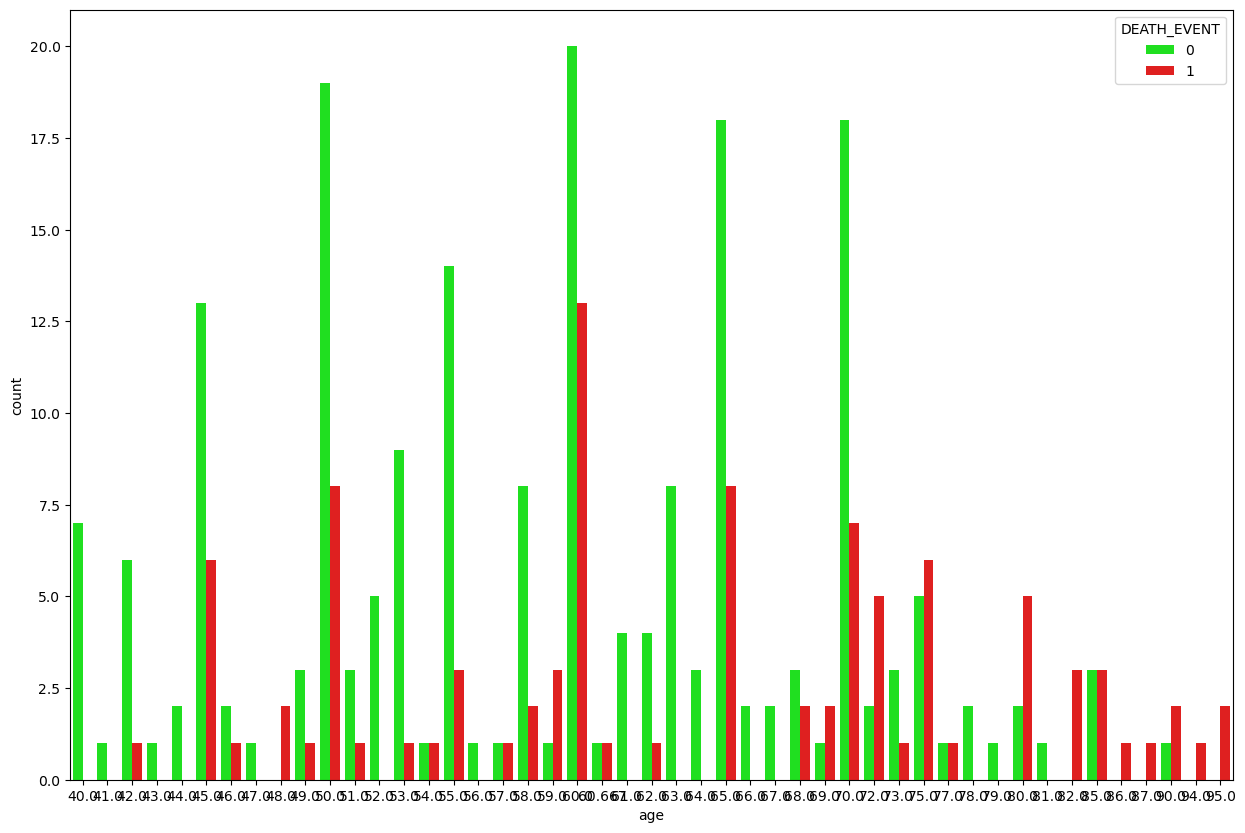

In [19]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x=data_df['age'],data=data_df, hue="DEATH_EVENT", palette=cols)

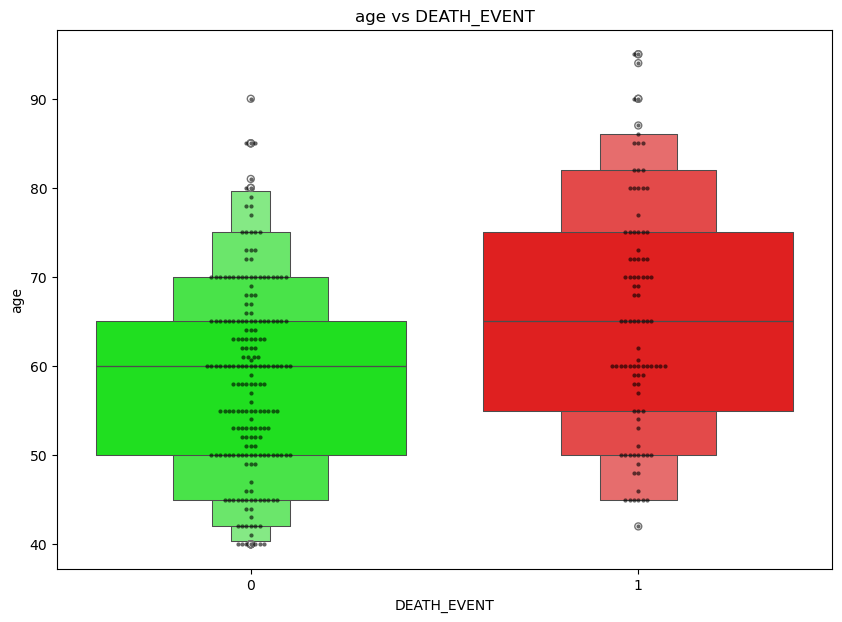

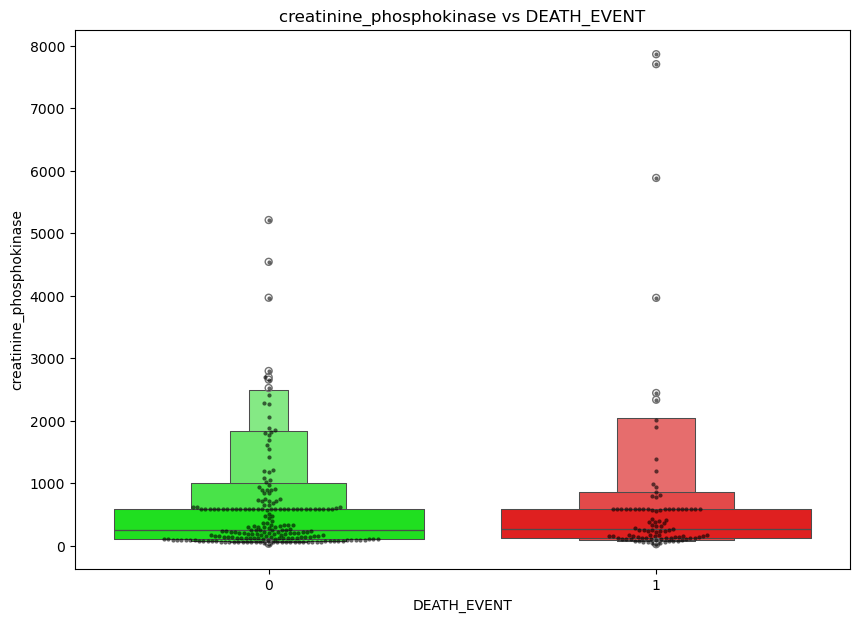

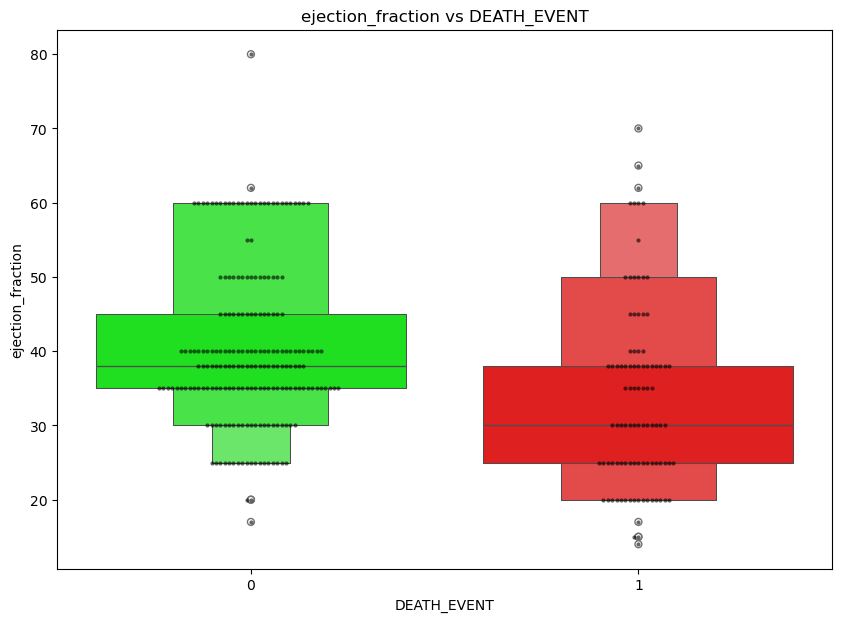

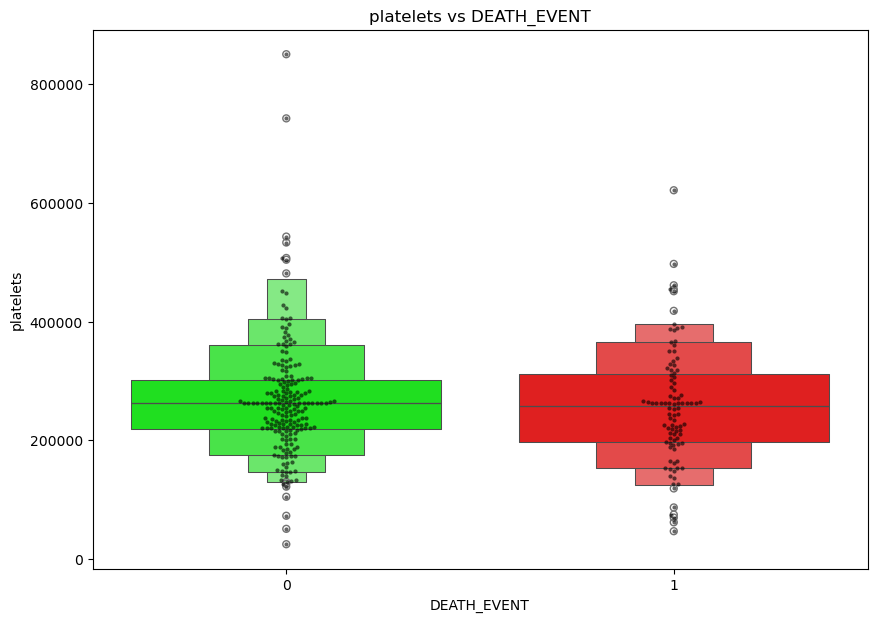

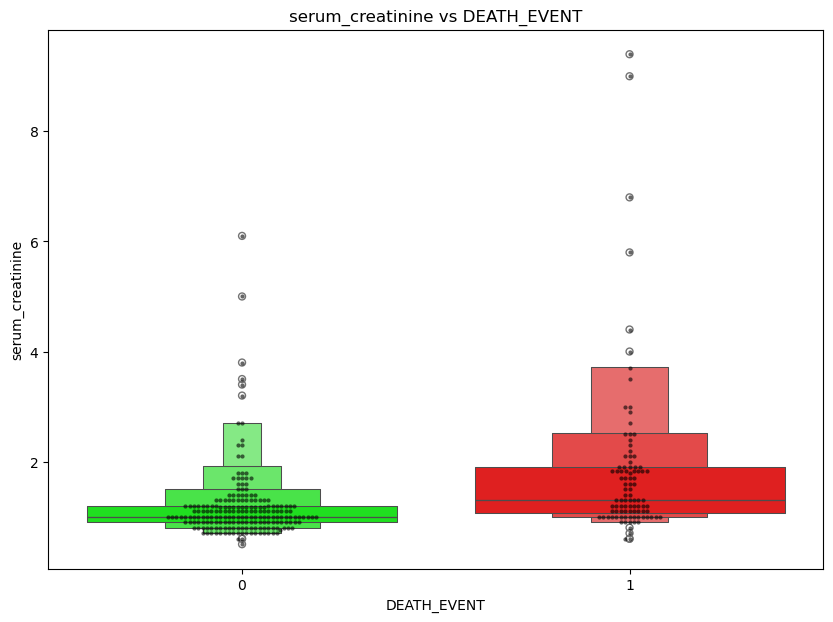

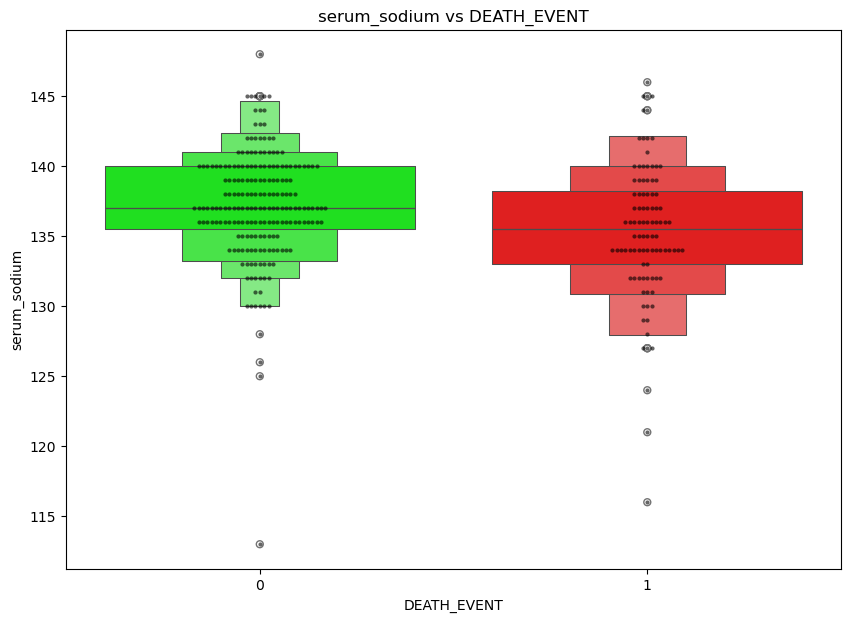

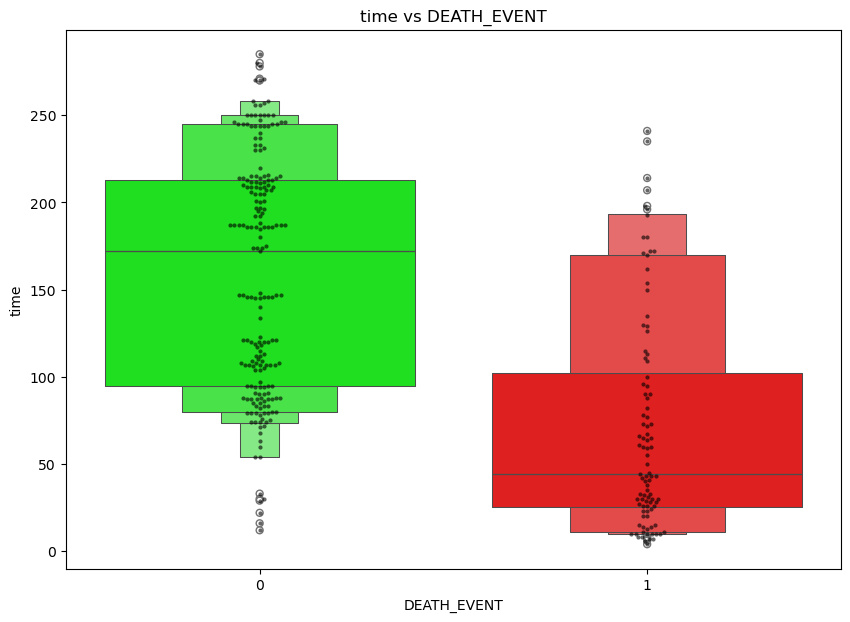

In [23]:
feature = ["age","creatinine_phosphokinase","ejection_fraction",
           "platelets","serum_creatinine","serum_sodium","time"]

for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(
        x="DEATH_EVENT",
        y=i,
        data=data_df,
        color="black",
        alpha=0.6,
        size=3
    )   
    sns.boxenplot(
        x="DEATH_EVENT",
        y=i,
        data=data_df,
        hue="DEATH_EVENT",
        palette=cols,
        legend=False
    )
    plt.title(f"{i} vs DEATH_EVENT")
    plt.show()

## **Step 3: Data Preprocessing**

In [28]:
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]
col_name=list(X.columns)
s_scaler=preprocessing.StandardScaler()
X_scaled=s_scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=col_name)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


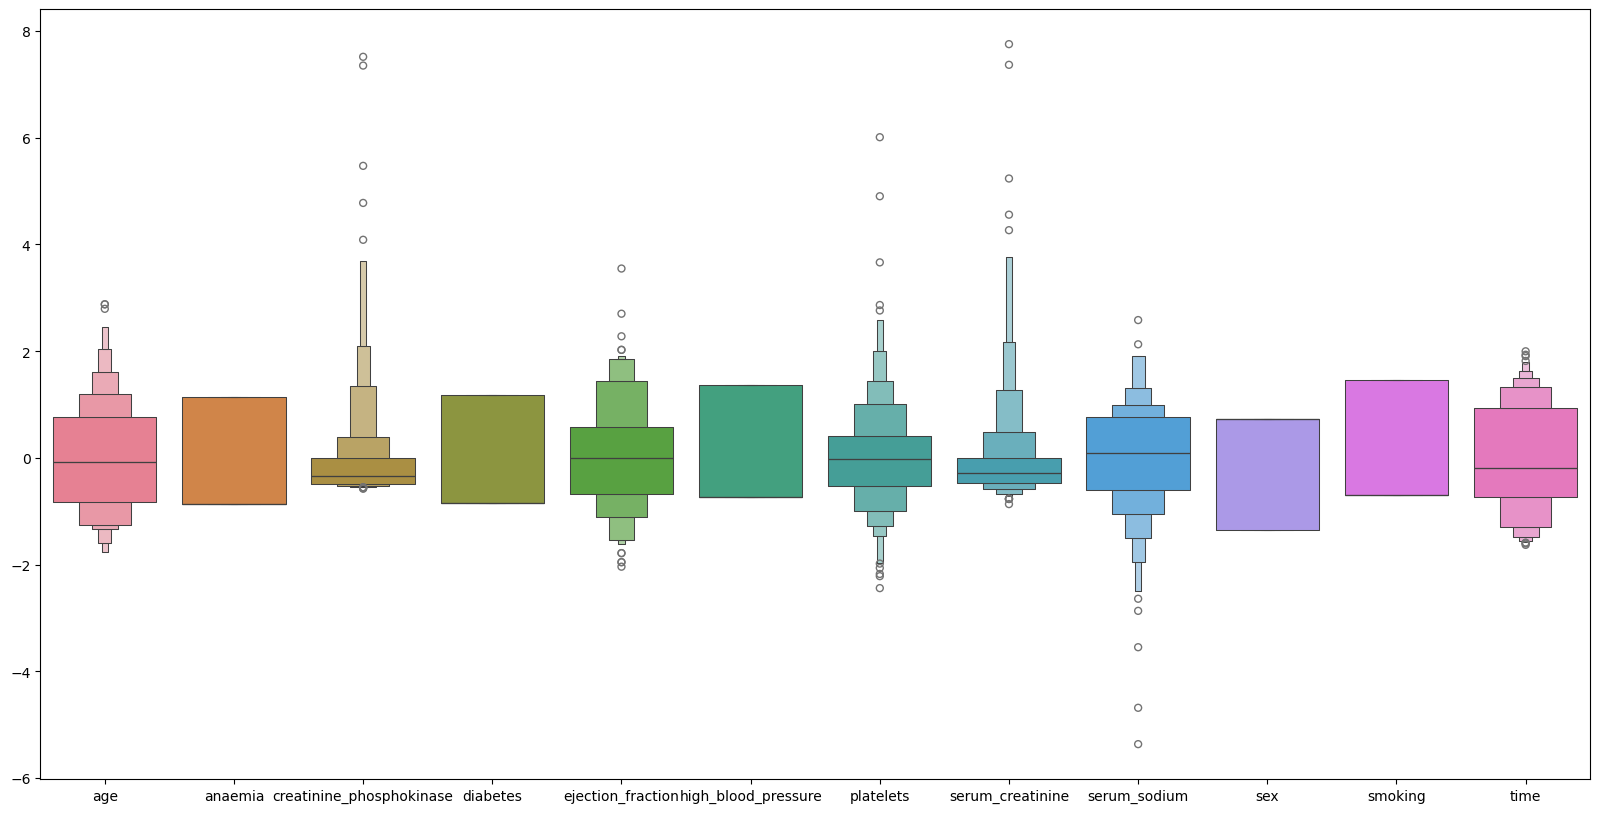

In [30]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [31]:
X_train, X_tests,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)

## **Step 4: Model Building**

#### **1.SVM**

In [32]:
model1= svm.SVC()
model1.fit(X_train, y_train)

SVC()

In [33]:
y_pred=model1.predict(X_tests)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0])

In [34]:
y_test

101    0
85     0
229    0
82     1
261    0
      ..
24     1
205    0
100    0
274    0
247    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [35]:
y_train

204    0
236    0
275    0
120    0
97     0
      ..
65     1
125    0
131    0
167    1
258    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        57
           1       0.80      0.61      0.69        33

    accuracy                           0.80        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.80      0.80      0.79        90



#### **2.ANN**

In [96]:
early_stopping =callbacks.EarlyStopping(
    min_delta=0.001,patience=20,restore_best_weights=True)
model =Sequential()
model.add(Dense(units=16, kernel_initializer='he_uniform',activation='relu',input_dim=12))
model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

C:\Users\pench\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
history = model.fit(X_train, y_train, batch_size = 25, epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7885 - loss: 0.4883 - val_accuracy: 0.6792 - val_loss: 0.5611
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7885 - loss: 0.4820 - val_accuracy: 0.6792 - val_loss: 0.5611
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8462 - loss: 0.4661 - val_accuracy: 0.6792 - val_loss: 0.5622
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8269 - loss: 0.4709 - val_accuracy: 0.6792 - val_loss: 0.5628
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8269 - loss: 0.4844 - val_accuracy: 0.6792 - val_loss: 0.5654
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8013 - loss: 0.4415 - val_accuracy: 0.6792 - val_loss: 0.5686
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8590 - loss: 0.4189 - val_accuracy: 0.6792 - val_loss: 0.5708
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7949 - loss: 0.4565 - val_accuracy: 0.6792 - val_loss:

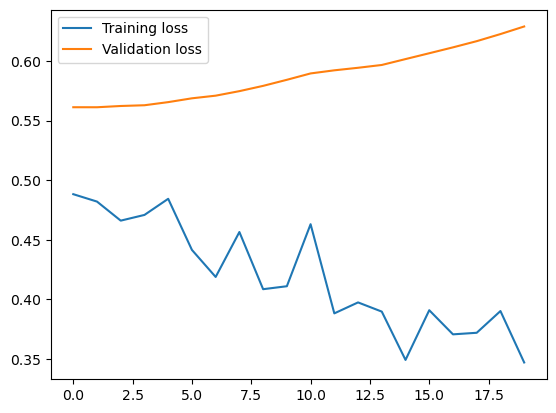

In [119]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label="Training loss")
plt.plot(history_df.loc[:,['val_loss']],label="Validation loss")
plt.legend()
plt.show()

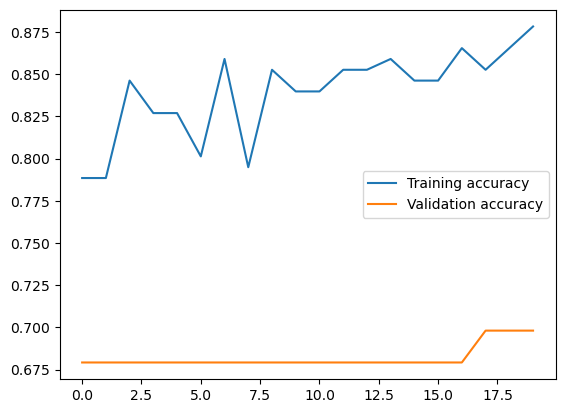

In [120]:
plt.plot(history_df.loc[:,['accuracy']],label="Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label="Validation accuracy")
plt.legend()
plt.show()

In [121]:
y_pred=model.predict(X_tests)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 


In [122]:
y_pred=(y_pred>0.5)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        57
           1       0.78      0.55      0.64        33

    accuracy                           0.78        90
   macro avg       0.78      0.73      0.74        90
weighted avg       0.78      0.78      0.77        90

